In [1]:
# import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# diabetes data set
diabetes = load_diabetes()
X = diabetes.data    # features
y = diabetes.target  # target variable

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# gradient boosting regressor model
gb_reg = GradientBoostingRegressor(
    n_estimators=200,         # 200 ağaç
    learning_rate=0.01,       # öğrenme oranı
    max_depth=5,              # ağaç derinliği
    subsample=0.8,            # verinin %80'iyle eğitim gerçekleştir
    min_samples_split=5,      # node bölünmesi için gerekli min örnek sayısı
    min_samples_leaf=4,       # yapraktaki min örnek sayısı
    validation_fraction=0.1,  # erken durdurma için validation set
    n_iter_no_change=5,       # 5 iterasyonda iyileşme yoksa durdur
    random_state=42
)

In [4]:
# training
gb_reg.fit(X_train, y_train)

# testing
y_pred = gb_reg.predict(X_test)

In [5]:
# evaluation: mse, r2 score
print(f"GBR RMSE: {mean_squared_error(y_test, y_pred) ** 0.5}")
print(f"GBR R2 SCORE: {r2_score(y_test, y_pred)}")

GBR RMSE: 57.14887663632432
GBR R2 SCORE: 0.3949966832471167


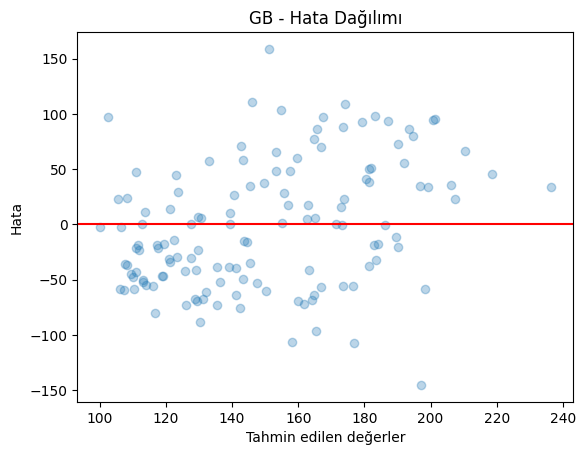

In [6]:
# residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="r")
plt.title("GB - Hata Dağılımı")
plt.xlabel("Tahmin edilen değerler")
plt.ylabel("Hata")
plt.show()